# V. Labor - Cauchy feladatok numerikus megoldása 


<div style="background :Red; padding: 1%!important;" >
    
A házi feladatokat <b>fel kell tölteni és be is kell mutatni</b> a Canvas-en megjelenő határidőig.  <br>
A feltöltendő fájl neve: <code>L5_azonosító.ipynb</code> .<br>
Elérhető maximális pontszám <code>10+2</code>. <br>
<b>A megoldáshoz egy új notebookot hozz létre!</b>

Numerikus megoldás [dokumentáció](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)   
A derivált mértani jelentése [videó](https://www.youtube.com/watch?v=pzyE1cUNxVc)  

## 1. Bevezető

Numerikus megoldáskor egy $$\begin{cases}y'(x)=f(x,y(x))\\y(x_0)=y_0\end{cases}$$

Cauchy-feladat megoldást közelítjük egy $[x_0,x_1]$ **intervallumon**.

A fenti egyenletben $y\colon\mathbb{R}\to\mathbb{R}^n$, az ismeretlen függvény, $x$ a változó, $f\colon\mathbb{R}\times\mathbb{R}^{n}\to\mathbb{R}^n$ adott.  
Ha $n=1$ akkor egy egyenletünk, ha $n>1$ akkor egy egyenlet rendszerünk van.

**Példa $n=1$-re.** $y'(x) = 2x$, $y(0)=1$, $x\in[0,2]$. 

A szimbolikusan kiszámolt megoldás $y(x)=x^2+1$.

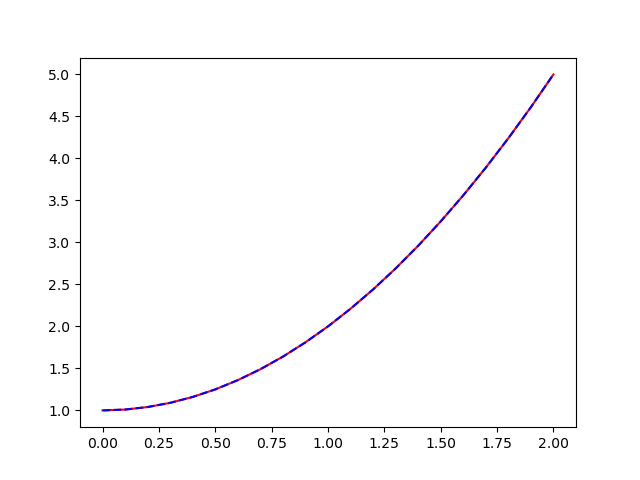

In [1]:
# y' = 2x, y(0) = 1, x ∈ [0,2]
%matplotlib widget
from scipy.integrate import solve_ivp 
import matplotlib.pyplot as plt
import numpy as np

fun = lambda x, y: 2 * x                                        # Az egyenlet jobb oldala: f(x,y)
interval = [0, 2]                                               # Megoldási intervallum: [x_0,x_1]
init = [1]                                                      # Kezdeti érték vektor: [y0] 
num_sol = solve_ivp(fun, interval, init, dense_output = True)   # az utolsó argumentum lényeges, emiatt lesz sol adattag

plt.close(1)
fig1, ax1 = plt.subplots(num=1)
x_vals = np.linspace(0,2,21)                                    # Egyenközű felosztás az [x_0,x_1] intervallumon
y_vals = num_sol.sol(x_vals)[0]                                 # Numerikus megoldó által számolt értékek, a [0] lényeges
y_symbolic_vals = x_vals**2+1                                   # Szimbolikusan számolt értékek 
ax1.plot(x_vals,y_vals,'r-'); 
ax1.plot(x_vals,y_symbolic_vals,'b--');

**Példa $n=2$-re.** $x'(t)=-\sin(t)$, $y'(t)=\cos(t)$, $x(0)=1$, $y(0)=0$, $t\in[0,2\pi]$  
A szimbolikusan kiszámolt megoldás $x(t)=\cos t$, $y(t)=\sin t$.  

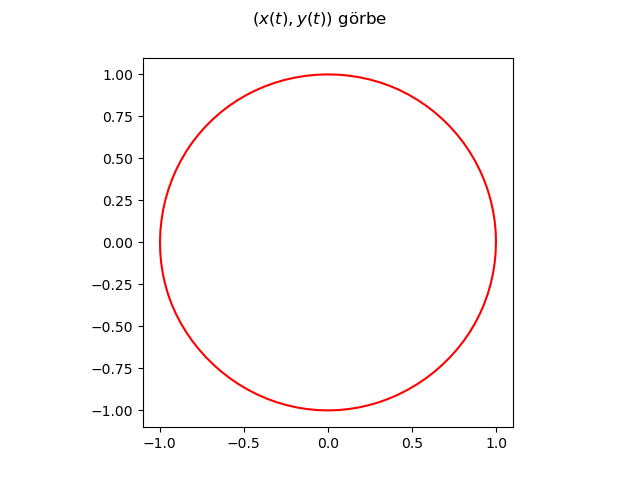

In [2]:
# x'(t) = -sin(t), y'(t) = cos(t), x(0) = 1, y(0) = 0, t\in[0,2\pi]
plt.close(2)                                                    
fig2,ax2 = plt.subplots(num=2)
ax2.set_aspect("equal")
fig2.suptitle("$(x(t),y(t))$ görbe")

num_sol2 = solve_ivp(lambda t,y: np.array([-np.sin(t),np.cos(t)]),[0,2*np.pi],np.array([1,0]),dense_output=True)
t_vals = np.linspace(0,np.pi*2,101)  
ax2.plot(num_sol2.sol(t_vals)[0],num_sol2.sol(t_vals)[1],"r-");

## 2. A Lotka-Volterra modell

Egy tóban a $t$. időpillanatban
- $x(t)$ a zsákmányhalak száma;
- $y(t)$ a ragadozó halak száma.

A modellt leíró egyenletrendszer a következő:

\begin{cases}
x' (t) = a\cdot x(t)-b\cdot x(t)\cdot y(t),\\
y'(t)=-c\cdot y(t)+d\cdot x(t)\cdot y(t),\\
x(0)=x_0,\\
y(0)=y_0,
\end{cases}

ahol $a, b, c, d, x_0, y_0>0$.

<h3 style="background :Red; padding: 1%!important;"> 1. Házi feladat. (2 pont)</h3>

Az $a=d=2$, $b=c=1$, $x_0=2$, $y_0=3$ esetben a beépített megoldó segítségével oldd meg a Lotka-Volterra modellt megadó Cauchy-feladatot, majd ábrázold a $x(t)$ és $y(t)$ függvényeket, valamint az $(x(t),y(t))$ pályagörbét a $[0,27]$ időintervallumon!

A következőkhöz hasonló ábrákat kell kapj.

| | |
|--|--|
|![im1.png]( 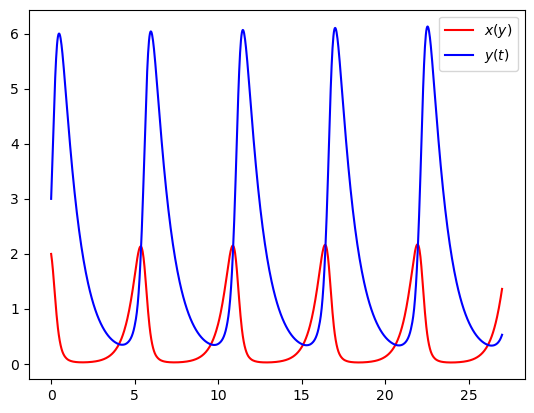)| ![im2.png]( 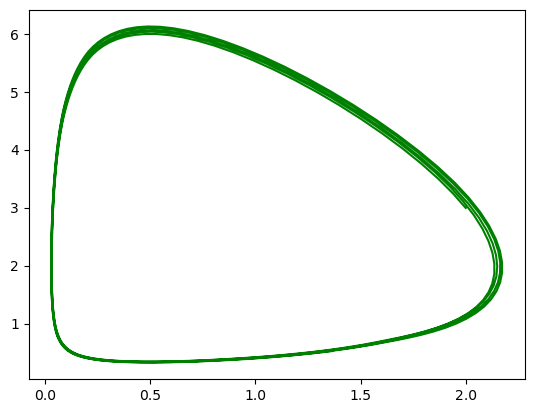)|

## 3. Az ingamozgás modellezése

Egy $l$ hosszúságú súlytalan, nyújthatatlan, egyenes fonál egyik végét rögzítjük, másik végére ráerősítünk egy $m$ tömegű pontszerű testet.  A testet kimozdítjuk, majd elengedjük.   
Határozzuk meg a test mozgását! (A közegellenállástól eltekintünk.)

<img style="width:500px" src=" 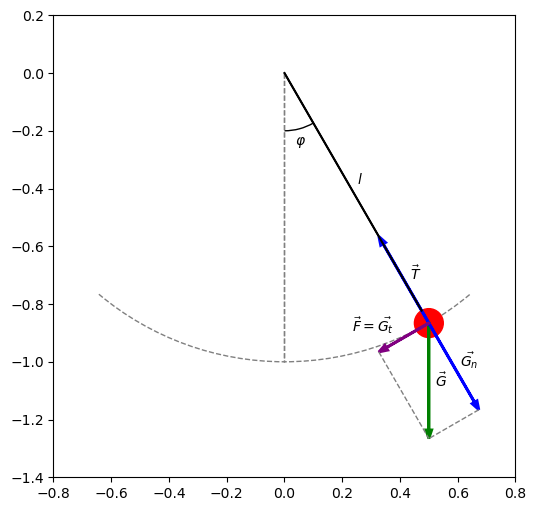"/>

**Megoldás.** Newton második törvénye alapján: $F=m\cdot a$. Mindent kifejezünk $\varphi(t)$ segítségével.

Ható erők: $\vec{G}=\vec{G}_t+\vec{G}_n$ gravitációs erő, $\vec{T}$ feszítőerő.

Mivel $\vec{T}+\vec{G}_n=\vec{0}$, ezért az eredő $F=G_t=-m\cdot g\cdot \sin(\varphi(t))$.

Teljesül, hogy: 
$d(t)=l\cdot\varphi(t)$, $\ v(t)=l\cdot\varphi'(t)$, $\ a(t)=l\cdot\varphi''(t)$.

Az alábbi differenciálegyenlethez jutunk, ami kézzel (szimbolikusan) **nem megoldható**: $$\varphi''(t)=-\frac{g}{l}\sin(\varphi(t)).\tag{1}$$

Ha $\varphi<5^\circ$, akkor $\sin(\varphi)\approx \varphi$ és vizsgálhatjuk az alábbi közelítő egyenletet, ami kézzel **megoldható**:
$$\varphi''(t)=-\frac{g}{l}\varphi(t).\tag{2}$$

<h3 style="background :Red; padding: 1%!important;"> 2. Házi feladat. (2 pont)</h3>

Készíts egy ábrát, amelyen megjeleníted az (1)-es és (2)-es egyenletek megoldását a $[0,10]$ időintervallumon, a $\varphi(0)=\varphi_0$ és $\varphi'(0)=0$ kezdeti feltételek mellett!  
Legyen $l=10\text{ m}$, $g=9{,}81\text{ m/s}^\text{2}$ és a $\varphi_0$ értékét ```interact``` segítségével lehessen változtatni a $\left[-\frac{\pi}{2},\frac{\pi}{2}\right]$ intervallumon!


<h3 style="background :Red; padding: 1%!important;"> 3. Házi feladat. (+2 pont)</h3>

A $\varphi(0)=30^\circ$, $\varphi'(0)=0$ esetben készíts egy animációt a mozgó ingáról! Az animációban jelenítsd meg a fonalat a ráerősített testtel együtt!

**FONTOS!!!** Másodrendű Cauchy-feladatot úgy oldunk meg numerikusan, hogy előtte átalakítjuk elsőrendű rendszerré.

$$\begin{cases}\varphi''(t)=-\frac{g}{l}\sin(\varphi(t))\\\varphi(0)=\varphi_0\\\varphi'(0)=\omega_0\end{cases}\quad\Longrightarrow\quad\begin{cases}\varphi'(t)=\omega(t)\\\omega'(t)=-\frac{g}{l}\sin(\varphi(t))\\\varphi(0)=\varphi_0\\\omega(0)=\omega_0\end{cases}$$


A továbbiakban azt tanulmányozzuk, hogy hogyan működik a numerikus megoldó, ehhez szükséges a derivált, a differenciálegyenlet és Cauchy feladat, mértani jelentésének ismerete.

### 4.1. A derivált mértani jelentése

Egy $g\colon\mathbb{R}\to\mathbb{R}$ függvény esetén
$$g'(x_0)=\lim_{x_1\to x_0} \frac{g(x_1)-g(x_0)}{x_1-x_0}$$
vagyis az $(x_0, g(x_0))$ pontban az $g$ grafikonjához húzott érintő iránytényezője. [videó](https://www.youtube.com/watch?v=pzyE1cUNxVc)

In [6]:
import ipywidgets as widgets

def create_anim():
    plt.ion()
    plt.close(3)
    fig3,ax3 = plt.subplots(num=3)                         

    def update(xplay=0):
        dx = (10-xplay)/20
        x0, y0 = 1, 1
        x1, y1 = x0+dx, (x0+dx)**2
        ax3.clear()
        ax3.set_xlim(-0.2,2.2)
        ax3.set_ylim(-0.4,4.4)
        ax3.plot(np.linspace(0,2,21),np.linspace(0,2,21)**2,'b')
        ax3.plot(x0,y0,'bo')
        ax3.plot(x1,y1,'ro')
        ax3.text(0.9, 1.2, '$(x_0,g(x_0))$', horizontalalignment='center', verticalalignment='center')
        if (xplay<8):
            ax3.text(x1-0.1, y1+0.2, '$(x_1,g(x_1))$', horizontalalignment='center', verticalalignment='center')
        ax3.plot([x0,x1],[y0,y0],'g')
        ax3.plot([x1,x1],[y0,y1],'g')
        if (xplay<10):
            ax3.text((x0+x1)/2,y0-0.2,'$\Delta x$', horizontalalignment='center', verticalalignment='center')
            ax3.text(x1+0.1,(y0+y1)/2,'$\Delta y$', horizontalalignment='center', verticalalignment='center')

            tan = (y1-y0)/(x1-x0)
        else:
            tan = 2
        ax3.plot([0.3,2],[y0-tan*0.7,y0+tan],'r')
    widgets.interact(update,xplay=widgets.Play(0,0,10));

interactive(children=(Play(value=0, description='xplay', max=10), Output()), _dom_classes=('widget-interact',)…

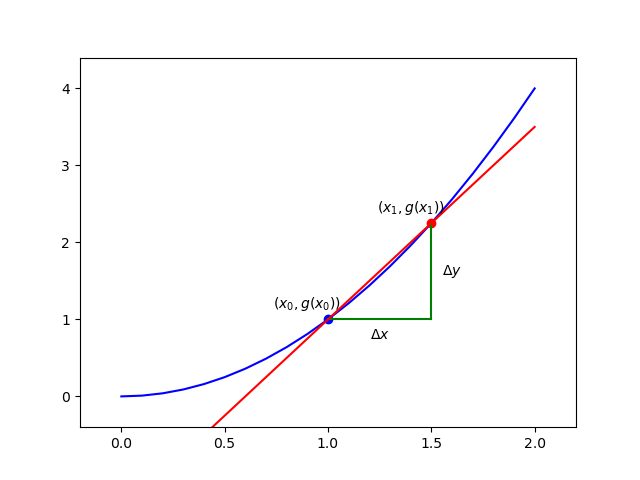

In [7]:
create_anim()

### 4.2. Differenciálegyenletek mértani jelentése

Tekintsük az $y'(x) = f(x,y(x))$ egyenlet.  

Legyen $\widetilde y$ egy sajátos megoldás, valamint $(u,v)=(u,\widetilde y(u))$ az $\widetilde y$ grafikonján egy tetszőleges pont.

Az $(u,v)$ pontban az $\widetilde y$ grafikonjához húzott érintő iránytényezője $f(u,v)$, irányvektora $(1, f(u,v))$.

Az egyenlet megoldásakor olyan $\widetilde y$ függvényeket keresünk, amelyek a grafikonjuk minden $(u,v)$ pontjában érintik az $(u,v)$ pontból induló $(1,f(u,v))$ vektort, vagyis az $(u,v;1,f(u,v))$ **vektormezőt**.

**Példa.** Az $y' = 2x$ egyenlethez az $(u, v; 1, 2u)$ vektormezőt rendeljük.  
A sajátos megoldások a vektormező **áramvonalai**, vagyis olyan görbék, amelyek minden pontban érintik a vektormezőt.

In [4]:
def create_plot1():
    plt.close(4)
    fig4, ax4 = plt.subplots(num=4)
    X,Y = np.meshgrid(np.arange(-0.1,2.1,0.1),np.arange(-0.2,5.2,0.2))
    ax4.set_title('Vektormező: $(u,v;1,2u)$')

    U,V = 0*X+1,2*X
    ax4.quiver(X,Y,U,V,angles='xy')

    x = np.linspace(0,2,21)
    ax4.plot(x,x**2,label="$x^2$")
    ax4.plot(x,x**2+0.5,label="$x^2+0.5$")
    ax4.plot(x,x**2+1,label="$x^2+1$")

    ax4.legend(loc="upper left");

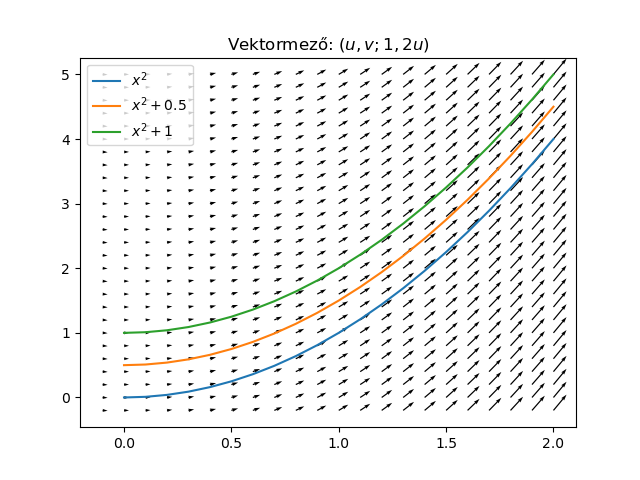

In [6]:
create_plot1()

### 4.3. Cauchy feladatok mértani jelentése

A Cauchy-feladat megoldása a kezdeti feltételnek megfelelő pontól induló áramvonal.

In [2]:
def create_plot2():
    plt.close(5)
    fig5, ax5 = plt.subplots(num=5)
    
    X,Y = np.meshgrid(np.arange(-0.1,2.1,0.1),np.arange(-0.2,5.2,0.2))
    U,V = 0*X+1,2*X
   
    def update(y0=0):
        sol = solve_ivp(lambda t, y: 2 * t, [0, 2], [y0], dense_output=True) 
        x_vals = np.linspace(0,2,21)
        y_vals = sol.sol(x_vals)[0]
        ax5.clear()
        ax5.quiver(X,Y,U,V,angles='xy')
        ax5.set_ylim(-0.2,5.2)
        ax5.plot(x_vals,y_vals,'b-')
        ax5.plot(0,y0,'bo')
    widgets.interact(update,y0=(0,2,0.1));    

interactive(children=(FloatSlider(value=0.0, description='y0', max=2.0), Output()), _dom_classes=('widget-inte…

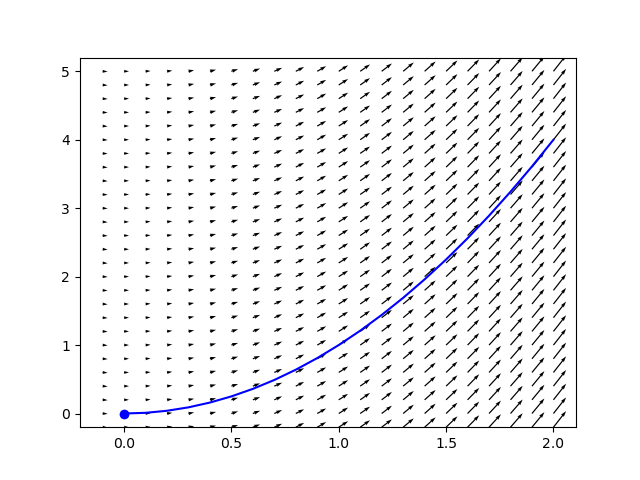

In [8]:
create_plot2()

### 4.4 Az Euler módszer

Oldjuk meg az $y'(x)=f(x,y(x))$, $y(x_0)=y_0$ Cauchy-feladatot az $[x_0,x_1]$ intervallumon.  

**Ötlet:** Pontokat határozunk meg, amelyeket összekötve közelítjük a megoldás grafikonját.

Legyen $n\in\mathbb{N}$. Az algoritmus a következő:

- legyen $u_0=x_0$, $v_0=y_0$ és $h=\dfrac{x_1-x_0}{n}$;
- minden $k\in\{0,1,\dots,n-1\}$ esetén legyen  
    - $u_{k+1} = u_k + h$;
    - $v_{k+1}=v_k+f(u_k,v_k)\cdot h$.

Az $u_0,u_1,\dots,u_n$ az $[x_0,x_1]$ intervallum **egyenközű felosztása**.  

Az $(u_0,v_0), (u_1,v_1), \dots, (u_n,v_n)$ pontokat összekötve a megoldás grafikonját közelítjük. 

Minél nagyobb az $n$, annál jobb a közelítés.

<h3 style="background :Red; padding: 1%!important;"> 4. Házi feladat. (2 pont)</h3>

Implementáld az Euler-módszert általános $f$, $x_0$, $x_1$, $y_0$ és $n$ paraméterekre.  
Az implementációt felhasználva oldd meg numerikusan az $y'(x) = x\cdot y(x)$, $y(0)=1$ Cauchy-feladatot az $x\in[0,2]$ intervallumon és ábrázold a közelítő megoldást a szimbolikus megoldással együtt.  
Az $n$ értéke ```interact``` segítségével legyen változtatható $1$ és $50$ között.

![img]( 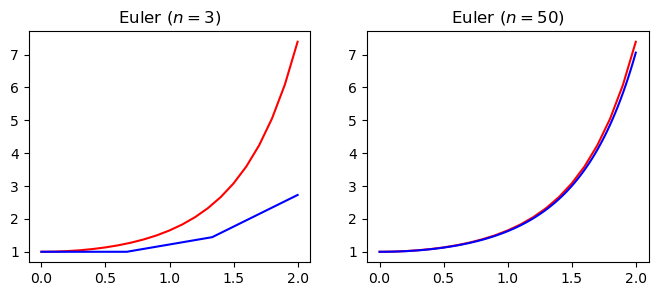)

### 4.5. További módszerek

Jobb közelítéseket kapunk, ha egy lépés alatt nem csak az előző pontban, hanem más, köztes pontokban számolt iránytényezőt is figyelembe veszünk az új pont koordinátáinak meghatározásakor. Erre alapoznak a Runge-Kutta módszerek. Az egyik leggyakrabban használt numerikus megoldó a negyedrendű Runge-Kutta, ami négy pontban vizsgálja az irányvektort, az új pont koordinátáinak meghatározásakor.

https://hu.wikipedia.org/wiki/Runge%E2%80%93Kutta-m%C3%B3dszer

## 5. Alkalmazás

<h3 style="background :Red; padding: 1%!important;"> 5. Házi feladat. (4 pont)</h3>

Készíts egy desktop alkalmazást (pl Java-ban), ami szimulálja a ferde hajítást. Minimális funkcionalitások: 
- hajítás indítása egy gombra kattintáskor;
- hajítás végén a test alaphelyzetbe állítása, egy másik gombra kattintáskor; 
- hajítási szög állítása (futási időben, amikor a test alaphelyzetben van),
- hajítás erősségének állítása (futási időben, amikor a test alaphelyzetben van),
- hajítás pályájának kirajzolása (mindig).

Az egyes időpillanatokban az elhajított test pozíciójának kiszámolásához használd az Euler módszert! Ehhez a másodrendű egyenleteket elsőrendű rendszerré kell alakítanod!

**A megoldást külön kell feltölteni <code>L05b_azonosító.zip</code> néven az L05b assignmenthez.**